In [36]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# load inflow dataset into dataframe
inflow_data = pd.read_excel("InflowData_1.xlsx")

# make list with dma names
dma_list = list(inflow_data.columns.values[1:])

# male list with dma description
dma_descripton = ["Hospital district",
                   "Residential district in the countryside",
                   "Residential district in the countryside",
                   "Suburban residential/commercial district",
                   "Residential/commercial district close to the city centre",
                   "Suburban district including sport facilities and office buildings",
                   "Residential district close to the city centre",
                   "City centre district",
                   "Commercial/industrial district close to the port",
                   "Commercial/industrial district close to the port"]

# make list with information of users supplied
users_supplied = [162,531,607,2094,7955,1135,3180,2901,425,776]

# make list with average net inflow
av_net_inflo = [8.4,9.6,4.3,32.9,78.3,8.1,25.1,20.8,20.6,26.4]

# change index of inflow dataframe to time step
inflow_data = inflow_data.set_index('Date-time CET-CEST (DD/MM/YYYY HH:mm)')

# change index format to datetime
inflow_data.index = pd.to_datetime(inflow_data.index, format="%d/%m/%Y %H:%M")

# print first two rows
inflow_data.head(3)

,DMA A (L/s),DMA B (L/s),DMA C (L/s),DMA D (L/s),DMA E (L/s),DMA F (L/s),DMA G (L/s),DMA H (L/s),DMA I (L/s),DMA J (L/s)
Date-time CET-CEST (DD/MM/YYYY HH:mm),,,,,,,,,,
2021-01-01 00:00:00,NaN,NaN,3.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,NaN,NaN,3.5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,NaN,NaN,3.2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN


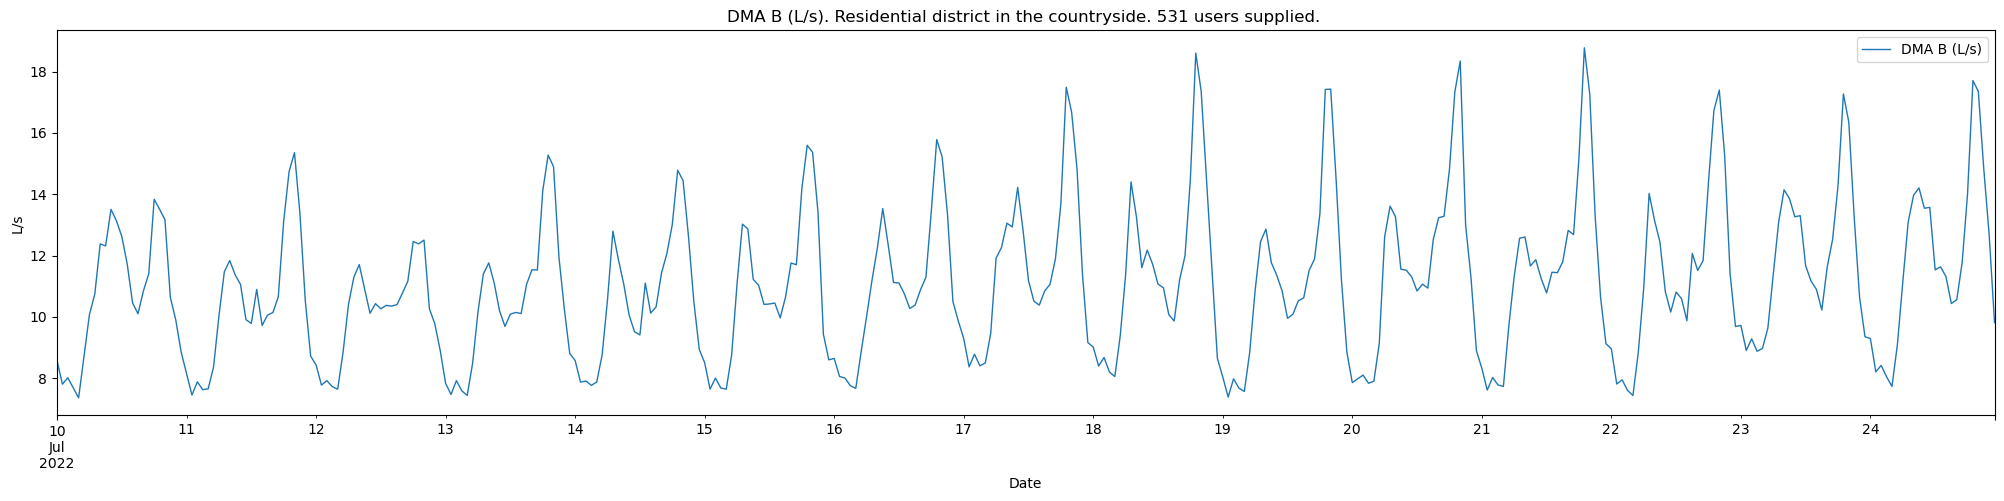

In [38]:
# define start and end dates for analysis
start = '2022-07-10'
end = '2022-07-24'

# plot time series for start and end dates
i = 1
fig, ax = plt.subplots()
inflow_data[start:end].plot(y=dma_list[i],use_index=True,ax = ax,figsize=(25,5), linewidth=1)
plt.title(dma_list[i] + ". " + dma_descripton[i] +". "+ str(users_supplied[i]) + " users supplied. ")
plt.xlabel("Date")
plt.ylabel("L/s")
plt.show()

In [39]:
# weather data
weather_data = pd.read_excel("WeatherData_1.xlsx")

# change index of weather dataframe to time step
weather_data = weather_data.set_index('Date-time CET-CEST (DD/MM/YYYY HH:mm)')

# change index format to datetime
weather_data.index = pd.to_datetime(weather_data.index, format="%d/%m/%Y %H:%M")

In [40]:
weather_data

,Rainfall depth (mm),Air temperature (°C),Air humidity (%),Windspeed (km/h)
Date-time CET-CEST (DD/MM/YYYY HH:mm),,,,
2021-01-01 00:00:00,0.0,7.2,79.0,9.0
2021-01-01 01:00:00,0.0,7.3,79.0,6.0
2021-01-01 02:00:00,0.0,7.6,78.0,4.0
2021-01-01 03:00:00,0.0,8.2,75.0,4.0
2021-01-01 04:00:00,0.0,7.7,77.0,7.0
...,...,...,...,...
2022-07-31 19:00:00,0.0,26.6,68.0,5.0
2022-07-31 20:00:00,0.0,26.8,65.0,6.0
2022-07-31 21:00:00,0.0,26.7,65.0,5.0


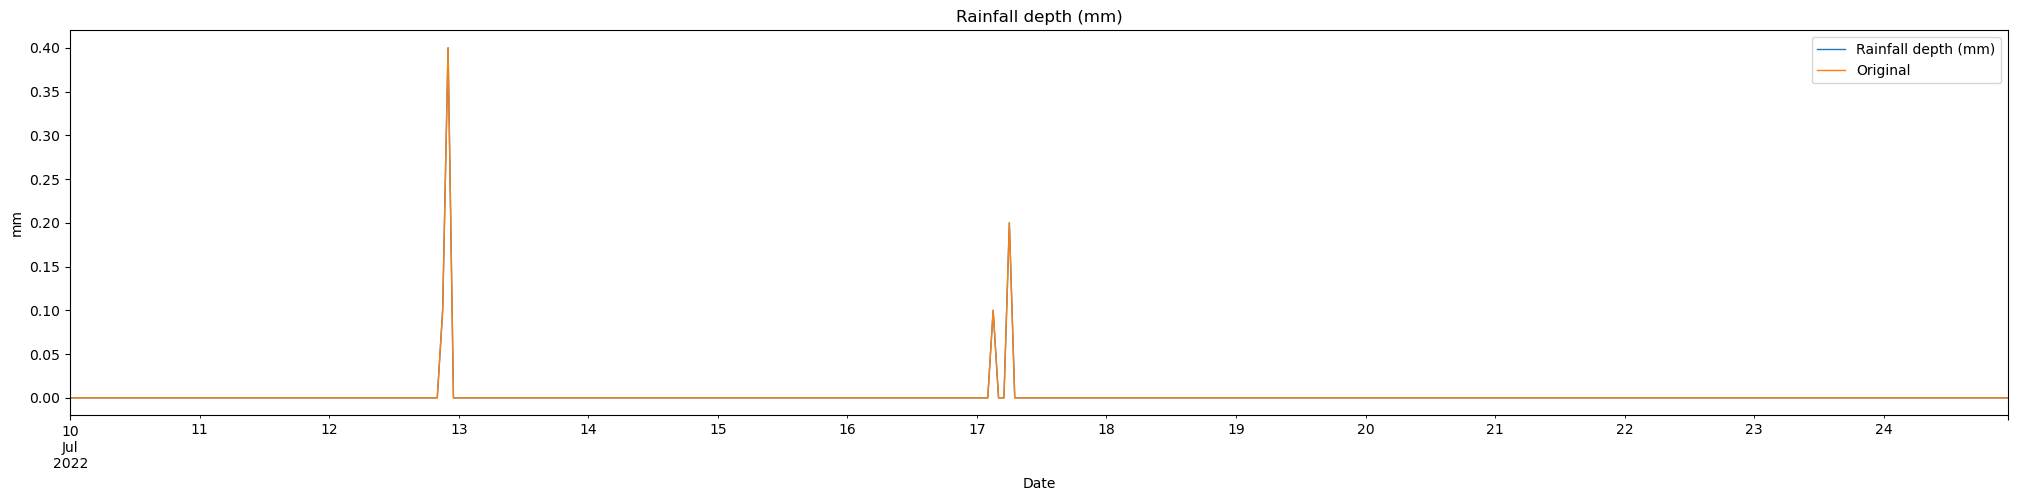

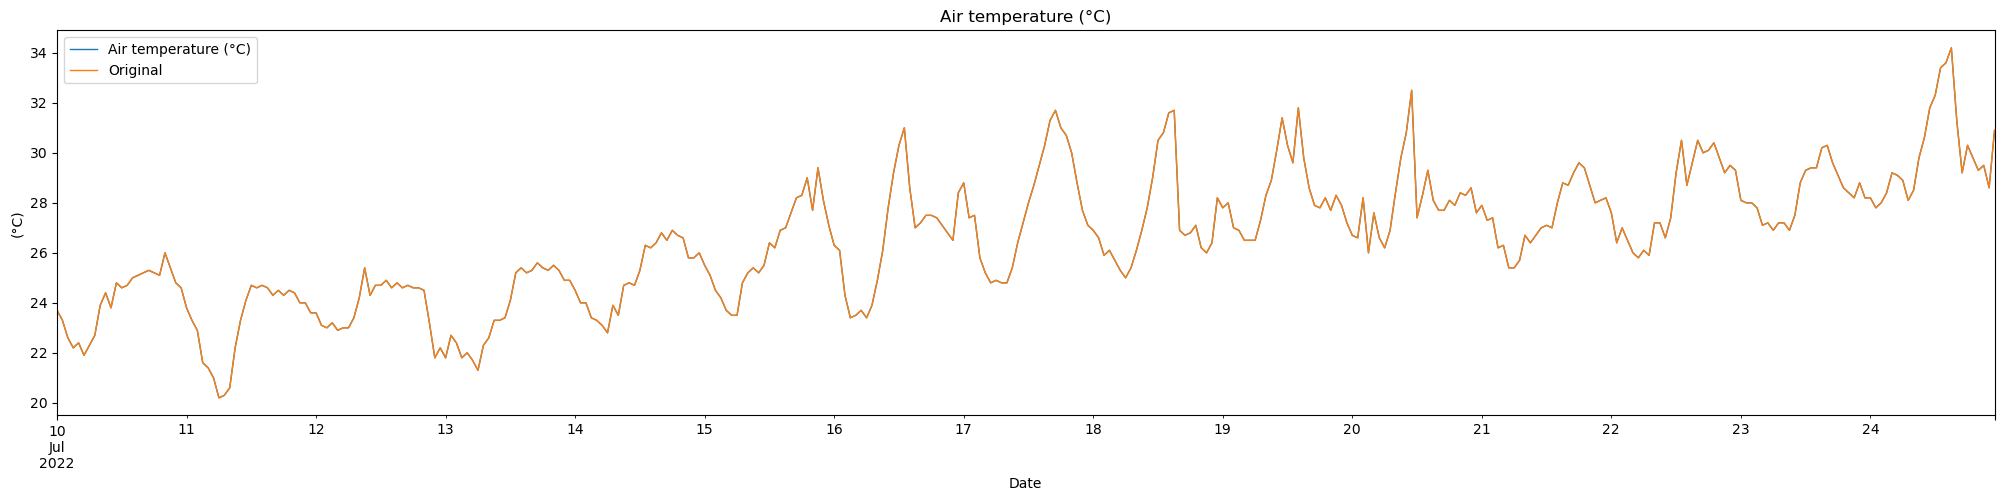

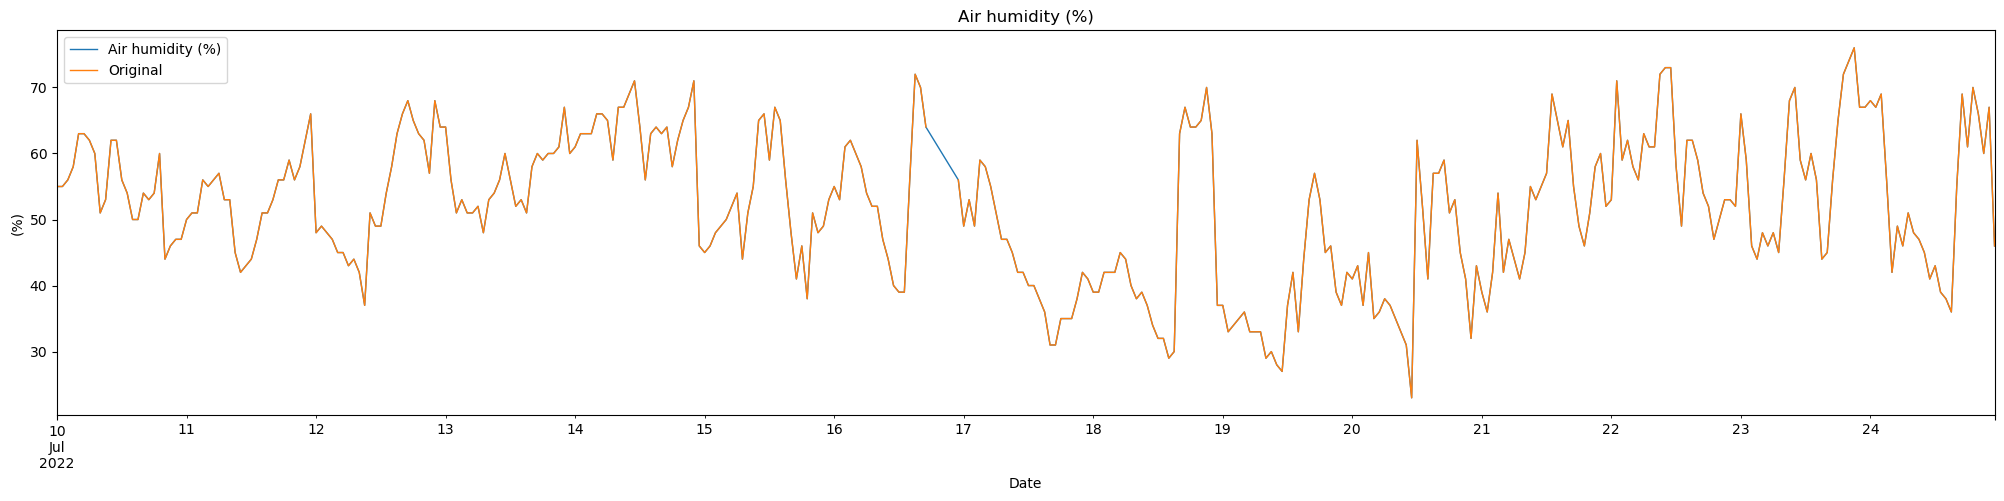

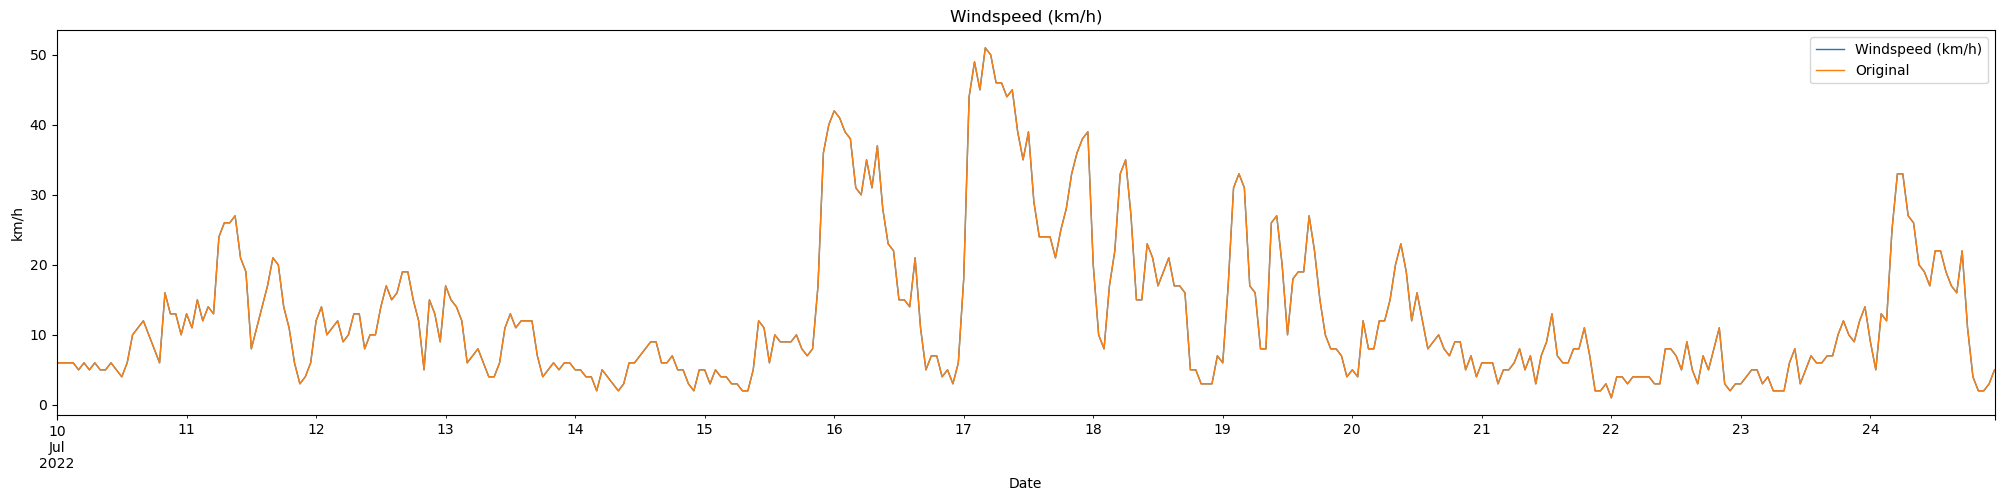

In [41]:
# reduce time series to specified start and end dates
tseriesX_df = weather_data[start:end].copy()

# fill missing values with interpolation technique
tseriesX_df.interpolate(limit_direction='both',inplace=True)

## visualize weather data

# RAINFALL
var = 'Rainfall depth (mm)'
fig, ax = plt.subplots()
tseriesX_df.plot(y=var,use_index=True,ax = ax,figsize=(25,5), linewidth=1,label=var)
weather_data[start:end].plot(y=var,use_index=True,ax = ax,figsize=(25,5), linewidth=1, label='Original')
plt.title(var)
plt.xlabel("Date")
plt.ylabel("mm")
plt.legend()
plt.show()

# AIR TEMPERATURE
var = 'Air temperature (°C)'
fig, ax = plt.subplots()
tseriesX_df.plot(y=var,use_index=True,ax = ax,figsize=(25,5), linewidth=1,label=var)
weather_data[start:end].plot(y=var,use_index=True,ax = ax,figsize=(25,5), linewidth=1, label='Original')
plt.title(var)
plt.xlabel("Date")
plt.ylabel("(°C)")
plt.legend()
plt.show()

# AIR HUMIDITY
var = 'Air humidity (%)'
fig, ax = plt.subplots()
tseriesX_df.plot(y=var,use_index=True,ax = ax,figsize=(25,5), linewidth=1,label=var)
weather_data[start:end].plot(y=var,use_index=True,ax = ax,figsize=(25,5), linewidth=1, label='Original')
plt.title(var)
plt.xlabel("Date")
plt.ylabel("(%)")
plt.legend()
plt.show()

# WINDSPEED
var = 'Windspeed (km/h)'
fig, ax = plt.subplots()
tseriesX_df.plot(y=var,use_index=True,ax = ax,figsize=(25,5), linewidth=1,label=var)
weather_data[start:end].plot(y=var,use_index=True,ax = ax,figsize=(25,5), linewidth=1, label='Original')
plt.title(var)
plt.xlabel("Date")
plt.ylabel("km/h")
plt.legend()
plt.show()

In [42]:
## make weekened and holidays exogenous variable

tseriesX_df['weekend (0/1)'] = 0
tseriesX_df[0:24] = 1
tseriesX_df[144:192] = 1
tseriesX_df[312:360] = 1

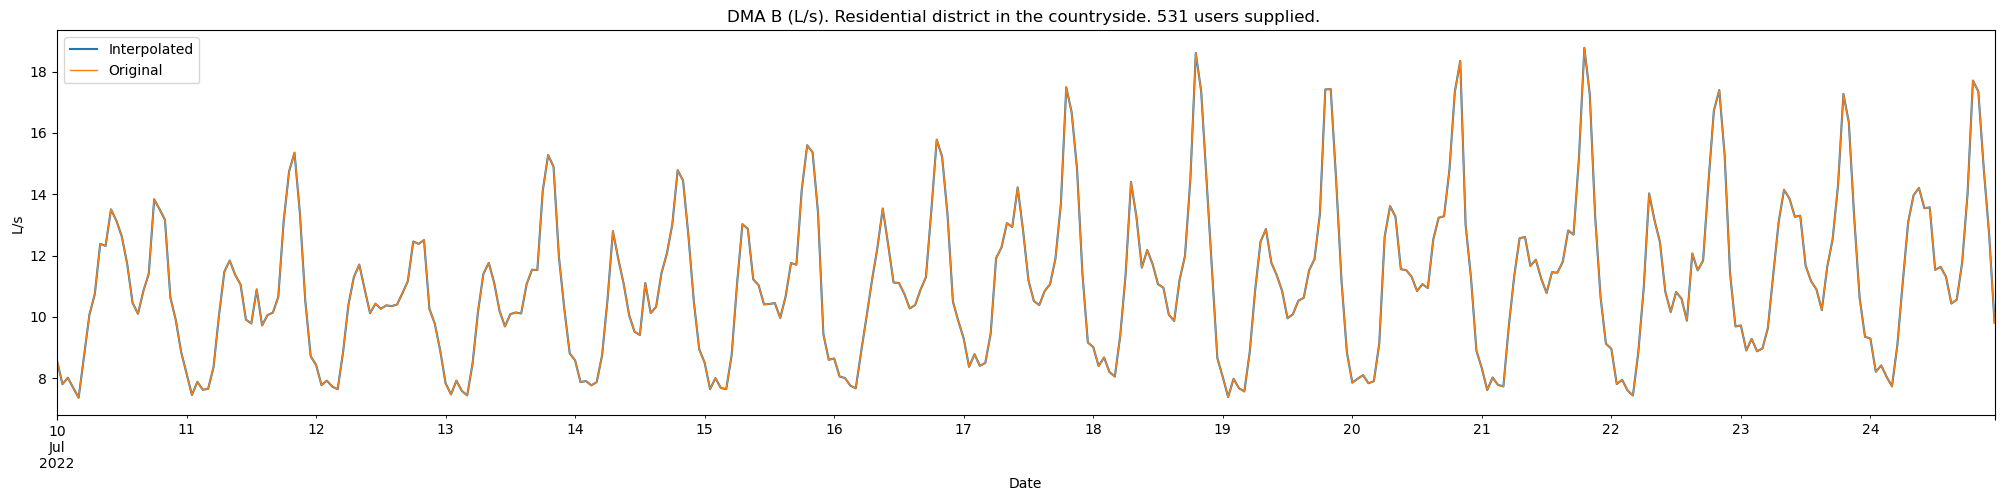

In [43]:
# select dma for analysis
dma = 'DMA B (L/s)'

# make dictionary with dma position in description list
dict_dma = dict(zip(dma_list, np.arange(0,len(dma_list))))

# copy data from dataframe in a new time series dataframe
tseries_df = inflow_data[dma][start:end].copy()

# fill missing values with interpolation technique
tseries_df.interpolate(limit_direction='both',inplace=True)

# plot original and interpolated time series for selected dma
fig, ax = plt.subplots()
tseries_df.plot(label='Interpolated')
inflow_data[dma][start:end].plot(y=dma_list[i],use_index=True,ax = ax,figsize=(25,5), linewidth=1, label='Original')
plt.title(dma_list[dict_dma[dma]] + ". " + dma_descripton[dict_dma[dma]] +". "+ str(users_supplied[dict_dma[dma]]) + " users supplied. ")
plt.xlabel("Date")
plt.ylabel("L/s")
plt.legend()
plt.show()

In [44]:
# imports for time series analysis
from statsmodels.tsa.seasonal import MSTL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# imports for time series forecasting
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import *
from sktime.forecasting.naive import NaiveForecaster

# create an utility metric function
def print_metrics(y_true, y_pred, model_name):
    mae_ = mean_absolute_error(y_true, y_pred)
    rmse_ = mean_squared_error(y_true, y_pred, square_root = True)
    mape_ = mean_absolute_percentage_error(y_true, y_pred)
    smape_ = mean_absolute_percentage_error(y_true, y_pred, symmetric = True)
    
    dict_ = {'MAE': mae_, 'RMSE': rmse_,
             'MAPE': mape_, 'SMAPE': smape_ }
    
    df = pd.DataFrame(dict_, index = [model_name])
    return(df.round(decimals = 2))

def print_performance_indicators(y_obs,y_pred):
    PI_1 = 1/24 * np.sum(np.abs(y_obs[0:24] - y_pred[0:24]))

    PI_2 = np.max(np.abs(y_obs - y_pred))

    PI_3 = 1/144 * np.sum(np.abs(y_obs[24:168] - y_pred[24:168]))

    print('Performance indicators')

    print(f"P1      P2      P3")
    print(f"{PI_1:{1}.{3}}  {PI_2:{1}.{3}}  {PI_3:{1}.{3}}  \n")

In [45]:
y = tseries_df
y_train, y_test = temporal_train_test_split(y, test_size = 168)

X = tseriesX_df
X_train, X_test = temporal_train_test_split(X, test_size=168)

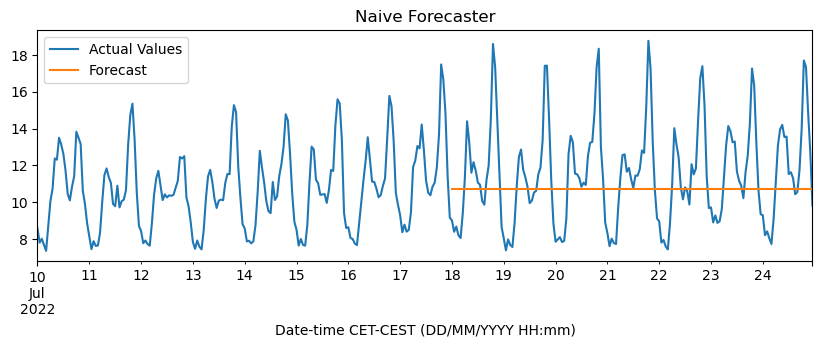

,MAE,RMSE,MAPE,SMAPE
Naive Forecaster,2.17,2.81,0.18,0.19


In [46]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = NaiveForecaster(strategy = 'mean')
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

fig, ax = plt.subplots(figsize = (10,3))
tseries_df.plot(title = 'Naive Forecaster', ax = ax)
y_pred.plot(ax = ax)
ax.legend(['Actual Values', 'Forecast'])
plt.show()

print_metrics(y_test, y_pred, 'Naive Forecaster')

In [47]:
print_performance_indicators(y_test,y_pred)

Performance indicators
P1      P2      P3
2.15  8.07  2.17  



In [48]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(y_train)
print(f'p-value: {adf_test[1]}')

p-value: 1.1083346321892646e-09


In [49]:
# y_train_diff = y_train.diff().dropna()
# y_train_diff.plot()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68268D+00    |proj g|=  9.88789D-01

At iterate    1    f=  1.65953D+00    |proj g|=  2.34229D-01

At iterate    2    f=  1.45347D+00    |proj g|=  2.94938D-01

At iterate    3    f=  1.19310D+00    |proj g|=  3.22391D-01

At iterate    4    f=  1.12065D+00    |proj g|=  2.42704D-01

At iterate    5    f=  1.07497D+00    |proj g|=  3.49556D-01

At iterate    6    f=  1.06349D+00    |proj g|=  3.24030D-01

At iterate    7    f=  1.04088D+00    |proj g|=  2.55883D-01

At iterate    8    f=  9.99601D-01    |proj g|=  3.15604D-01

At iterate    9    f=  9.61572D-01    |proj g|=  2.67587D-01

At iterate   10    f=  9.44159D-01    |proj g|=  2.37922D-01

At iterate   11    f=  9.31789D-01    |proj g|=  2.27161D-01

At iterate   12    f=  9.30380D-01    |proj g|=  2.36552D-01

At iterate   13    f=  9.1

/home/carlos/miniconda3/envs/water-demand-forecasting/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)



At iterate   41    f=  8.72689D-01    |proj g|=  6.98451D-02

At iterate   42    f=  8.70791D-01    |proj g|=  8.77541D-02

At iterate   43    f=  8.68357D-01    |proj g|=  1.39723D-01

At iterate   44    f=  8.64385D-01    |proj g|=  8.17619D-02

At iterate   45    f=  8.62390D-01    |proj g|=  5.15816D-02

At iterate   46    f=  8.60693D-01    |proj g|=  5.55510D-02

At iterate   47    f=  8.60296D-01    |proj g|=  1.28621D-01

At iterate   48    f=  8.59357D-01    |proj g|=  2.72243D-02

At iterate   49    f=  8.59115D-01    |proj g|=  2.01989D-02

At iterate   50    f=  8.58890D-01    |proj g|=  2.95732D-02

At iterate   51    f=  8.58638D-01    |proj g|=  2.47911D-02

At iterate   52    f=  8.58566D-01    |proj g|=  2.11613D-02

At iterate   53    f=  8.58491D-01    |proj g|=  1.23252D-02

At iterate   54    f=  8.58455D-01    |proj g|=  9.61083D-03

At iterate   55    f=  8.58432D-01    |proj g|=  1.92410D-02

At iterate   56    f=  8.58401D-01    |proj g|=  7.37015D-03

At iter

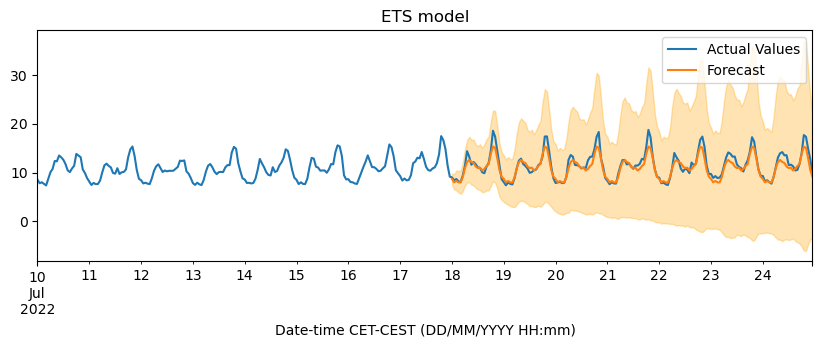

Performance indicators
P1      P2      P3
0.73  3.43  0.769  



In [50]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

# Build ets model
model = ETSModel(endog=y_train, # y should be a pd.Series
    seasonal='mul',
    seasonal_periods=24,
)
model_fit = model.fit()

y_pred = model_fit.get_prediction(start='2022-07-18 00:00:00', end='2022-07-24 23:00:00').summary_frame(alpha=0.05)

fig, ax = plt.subplots(figsize = (10,3))
tseries_df.plot(title = 'ETS model', ax = ax)
y_pred.plot(y='mean',ax = ax)
ax.fill_between(y_pred.index, y_pred['pi_lower'], y_pred['pi_upper'],color='orange', alpha=0.3)
ax.legend(['Actual Values', 'Forecast'])
plt.show()

print_performance_indicators(y_test,y_pred['mean'])

In [51]:
print_performance_indicators(y_test,y_pred['mean_numerical'])

Performance indicators
P1      P2      P3
0.7  3.49  0.799  

